CNN_GoogLeNet의 업데이트 버젼으로.  
1x1 Convolution을 사용해 준다 . 이렇게되면 연산의량이 줄어들고 좀더 풍부한   
Feature map을 생성할 수 있게 된다.

In [1]:
# 인셉션 모듈을 만드는 것에 필요한 모듈 불러오기.
import tensorflow as tf
import tensorflow.keras as keras

# 모델 시각화
from tensorflow.keras.utils import plot_model

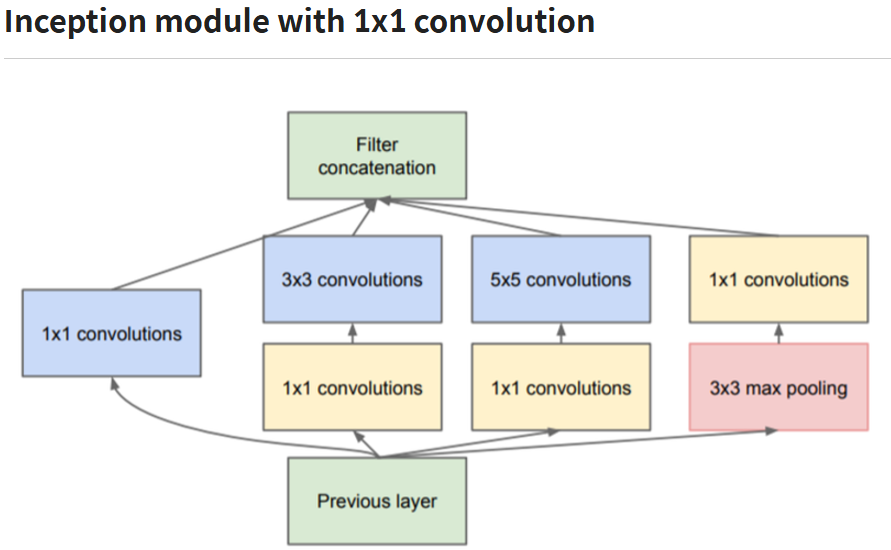

In [6]:
# Inception 블록을 만들기 위한 함수.
def inception(input_layer, conv1_filter, conv3_in, conv3_out, conv5_in, conv5_out, pooling_out) :

    # 1x1 사이즈와 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter,
                         (1, 1),
                         padding = 'same',
                         activation = 'relu')(input_layer)

    # 3x3 사이즈의 kernel을 이용한 convolution2d layer

    # 여기 이 부분이 Naive 버전과 가장 차별화되는 부분: 1x1 convolution을 사용하는 부분.
    conv3 = keras.layers.Conv2D(conv3_in,
                                (1, 1),
                                padding = 'same',
                                activation = 'relu')(input_layer)
    conv3 = keras.layers.Conv2D(conv3_out,
                               (3, 3),
                               padding = 'same',
                               activation = 'relu')(conv3)

    # 5x5 사이즈의 kernel을 이용한 convolution2d layer
    conv5 = keras.layers.Conv2D(conv5_in,
                         (1, 1),
                         padding = 'same',
                         activation = 'relu')(input_layer)
    conv5 = keras.layers.Conv2D(conv5_out,
                         (5, 5),
                         padding = 'same',
                         activation = 'relu')(conv5)

    # 3x3 Max Pooling layer (데이터의 3x3에서 큰 값 출력)
    pool = keras.layers.MaxPooling2D((3, 3),
                                     strides = (1, 1),
                                     padding = 'same')(input_layer)
    pool = keras.layers.Conv2D(pooling_out,
                               (1, 1),
                               padding = 'same',
                               activation = 'relu')(pool)

    # 위의 4개의 layer를 통해서 나온 feature map들을 모두 concatenation
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

In [7]:
# input layer를 정의하고 Inception 블록을 생성.
input_data = keras.layers.Input(shape = (256, 256, 3))
inception_out = inception(input_data, 64, 96, 128, 16, 32, 32)

In [8]:
print(inception)

<function inception at 0x79867d2a7eb0>


In [9]:
# input layer와 inception 블록을 연결해 모델을 만듬

# 모델 만들기
model = keras.models.Model(inputs = input_data,
                           outputs = inception_out)

# 생셩한 모델의 구조 확인하기
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 96)   │            384 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 16)   │             64 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 3)    │              0 │ input_layer_2[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │            256 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 128)  │        110,720 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 256, 256, 32)   │         12,832 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 256, 256, 32)   │            128 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 256)  │              0 │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_6[0][0],        │
│                           │                        │                │ conv2d_7[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 124,384 (485.88 KB)

 Trainable params: 124,384 (485.88 KB)

 Non-trainable params: 0 (0.00 B)

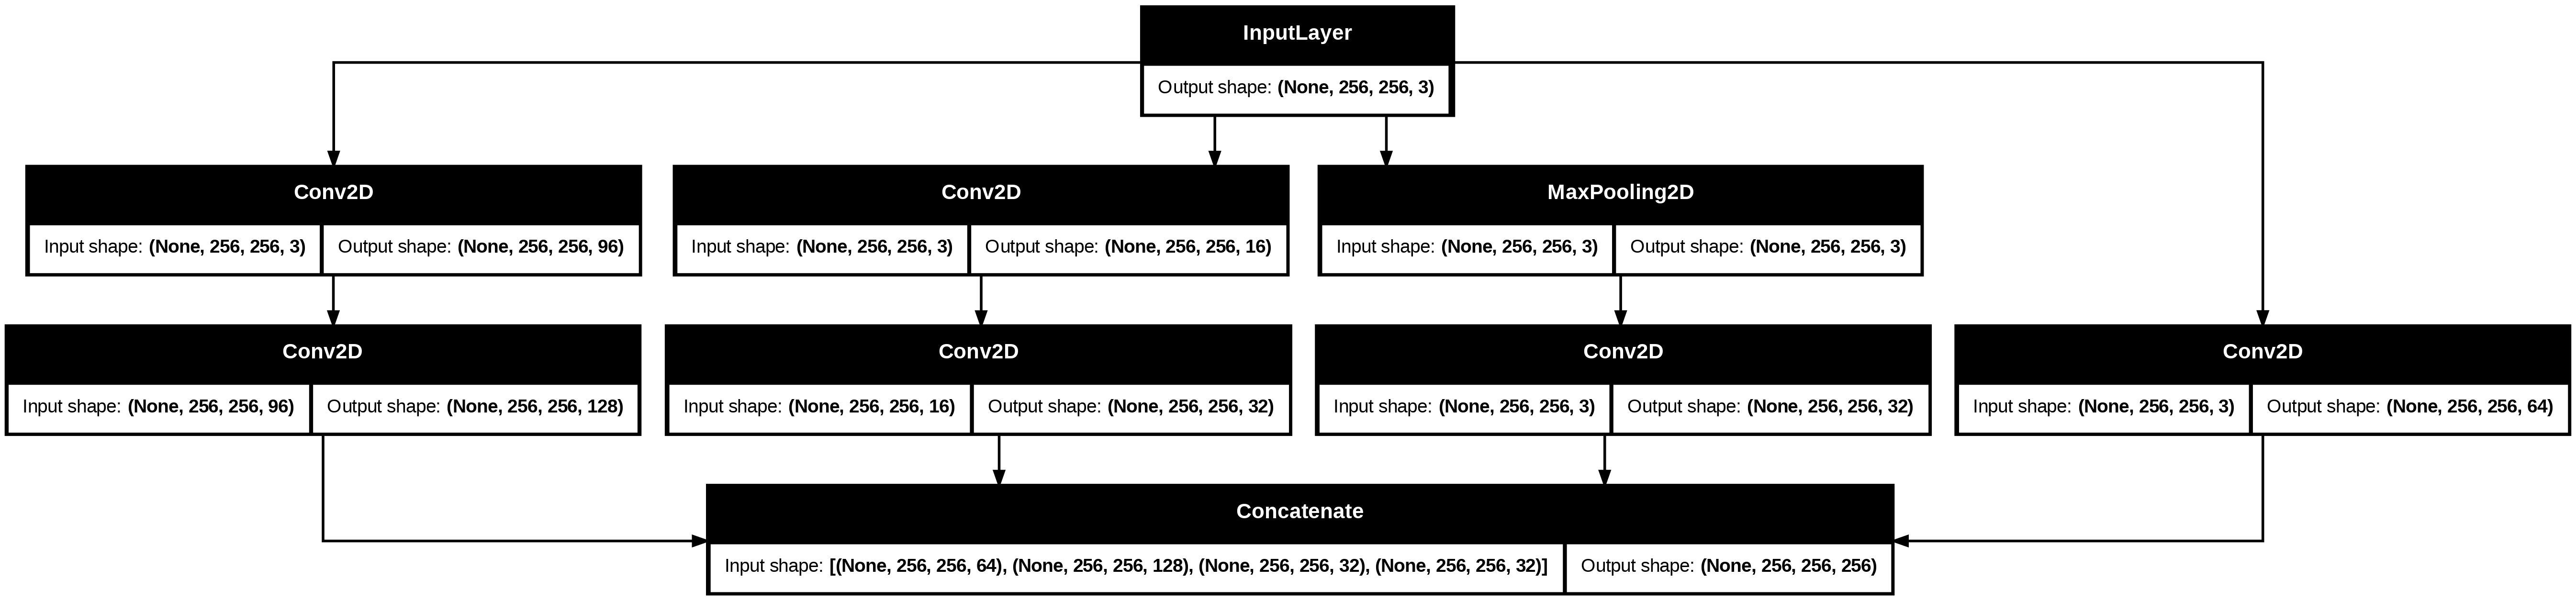

In [10]:
# plot_model 함수로 모델의 구조를 시각화
plot_model(model,
           show_shapes = True,
           to_file = 'inception.png')